In [1]:
import pandas as pd
import random
import re
from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Using TensorFlow backend.


# review_rating data EDA

In [2]:
review_rating = pd.read_csv('review_rating.csv')

In [3]:
review_rating = review_rating.astype({'rating': 'category'})
review_rating.head()

,Unnamed: 0,review,rating
0,0,Great with a salad. Cooked on top of stove for...,4
1,2,This worked very well and is EASY. I used not...,4
2,5,very very sweet. after i waited the 2 days i b...,4
3,7,This recipe was OVERLY too sweet. I would sta...,2
4,8,Very good!,4


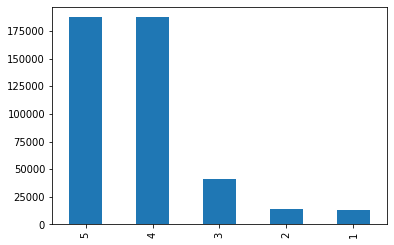

In [4]:
review_rating['rating'].value_counts().plot(kind='bar')

In [5]:
print(review_rating.groupby('rating').size().reset_index(name='count'))

  rating   count
0      1   12815
1      2   14122
2      3   40852
3      4  187333
4      5  187333


In [6]:
review_rating.isnull().values.any()

False

In [7]:
review_rating.drop_duplicates(inplace=True)
review_rating.duplicated().sum()

0

In [8]:
print(review_rating.groupby('rating').size().reset_index(name='count'))

  rating   count
0      1   12815
1      2   14122
2      3   40852
3      4  187333
4      5  187333


In [9]:
len(review_rating)

442455

In [10]:
X_data = review_rating['review']
y_data = review_rating['rating']
print('review 개수: {}'.format(len(X_data)))
print('rating개수: {}'.format(len(y_data)))

review 개수: 442455
rating개수: 442455


In [11]:
normalized_text = []
for string in X_data.tolist():
    try:
        tokens = re.sub(r"[^a-zA-Z0-9]+", " ", string.lower())
    except Exception as e:
        print(string)
        break
    normalized_text.append(tokens)

In [12]:
normalized_text[:5]

['great with a salad cooked on top of stove for 15 minutes added a shake of cayenne and a pinch of salt used low fat sour cream thanks ',
 'this worked very well and is easy i used not quite a whole package 10oz of white chips great ',
 'very very sweet after i waited the 2 days i bought 2 more pints of raspberries and added them to the mix i m going to add some as a cake filling today and will take a photo ',
 'this recipe was overly too sweet i would start out with 1 3 or 1 4 cup of sugar and jsut add on from there just 2 cups was way too much and i had to go back to the grocery store to buy more raspberries because it made so much mix overall i would but the long narrow box or raspberries its a perfect fit for the recipe plus a little extra i was not impressed with this recipe it was exceptionally over sweet if you make this simple recipe make sure to add less sugar ',
 'very good ']

In [13]:
t = Tokenizer()
t.fit_on_texts(normalized_text)
X_encoded = t.texts_to_sequences(normalized_text)
vocab_size = len(t.word_index) + 1

print(X_encoded[:3])

[[30, 13, 4, 178, 135, 27, 157, 9, 821, 8, 481, 113, 42, 4, 1877, 9, 580, 3, 4, 943, 9, 137, 20, 269, 238, 304, 106, 26], [7, 284, 22, 89, 3, 16, 44, 1, 20, 29, 194, 4, 176, 1056, 5750, 9, 260, 330, 30], [22, 22, 110, 123, 1, 2425, 2, 60, 727, 1, 596, 60, 49, 3195, 9, 1569, 3, 42, 40, 6, 2, 190, 1, 109, 266, 6, 68, 45, 24, 4, 143, 273, 466, 3, 34, 375, 4, 759]]


리뷰의 최대 길이 : 1308
리뷰의 평균 길이 : 284.62103490750474


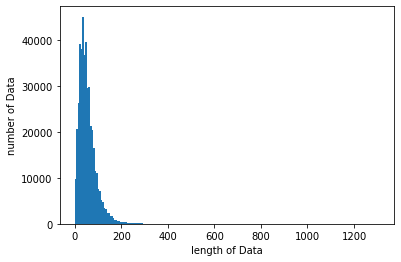

In [14]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_encoded))
print('리뷰의 평균 길이 :',sum(map(len, X_data))/len(X_encoded))
plt.hist([len(s) for s in X_encoded], bins=200)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [15]:
max_len = 60 # 전체 데이터의 길이는 60으로 맞춘다.
X_data = pad_sequences(X_encoded, maxlen = max_len)

# Fasttext

In [16]:
n=0
f = open('C:\\Users\\user\\Documents\\GitHub\\grad_project\\recipe_rating\\preprocessing\\cc.en.300.vec\\cc.en.300.vec', encoding="utf8")

for line in f:
    word_vector = line.split() # 각 줄을 읽어와서 word_vector에 저장.
    print(word_vector) # 각 줄을 출력
    word = word_vector[0] # word_vector에서 첫번째 값만 저장
    print(word) # word_vector의 첫번째 값만 출력
    n=n+1
    if n==2:
        break
f.close()

['2000000', '300']
2000000
[',', '0.1250', '-0.1079', '0.0245', '-0.2529', '0.1057', '-0.0184', '0.1177', '-0.0701', '-0.0401', '-0.0080', '0.0772', '-0.0226', '0.0893', '-0.0487', '-0.0897', '-0.0835', '0.0200', '0.0273', '-0.0194', '0.0964', '0.0875', '0.0098', '0.0453', '0.0155', '0.1462', '0.0225', '0.0448', '0.0137', '0.0570', '0.1764', '-0.1072', '-0.0826', '0.0173', '0.1090', '0.0207', '-0.1271', '0.2445', '0.0375', '-0.0209', '-0.0445', '0.0540', '0.1282', '0.0437', '0.0588', '0.0984', '0.0539', '0.0004', '0.1290', '0.0242', '-0.0120', '-0.0480', '0.0346', '-0.0664', '-0.0330', '-0.0625', '-0.0708', '-0.0579', '0.1738', '0.4448', '0.0370', '-0.1001', '-0.0032', '0.0359', '-0.0685', '-0.0361', '0.0070', '0.1316', '-0.0945', '-0.0610', '0.0178', '-0.0763', '-0.0192', '0.0033', '0.0056', '0.1878', '-0.0754', '-0.0095', '0.0446', '-0.0588', '0.0244', '-0.0251', '-0.0493', '0.0308', '-0.0359', '-0.1884', '-0.0988', '0.1887', '0.0459', '-0.0816', '-0.1524', '-0.0375', '-0.0692', '0.0

In [17]:
print(type(word_vector))
print(len(word_vector))

<class 'list'>
301


In [18]:
import numpy as np
embedding_dict = dict()
f = open('C:\\Users\\user\\Documents\\GitHub\\grad_project\\recipe_rating\\preprocessing\\cc.en.300.vec\\cc.en.300.vec', encoding="utf8")

for line in f:
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32') # 100개의 값을 가지는 array로 변환
    embedding_dict[word] = word_vector_arr
f.close()
print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

2000000개의 Embedding vector가 있습니다.


In [19]:
embedding_matrix = np.zeros((vocab_size, 300))
# 단어 집합 크기의 행과 100개의 열을 가지는 행렬 생성. 값은 전부 0으로 채워진다.
np.shape(embedding_matrix)

(86811, 300)

In [20]:
for word, i in t.word_index.items(): # 훈련 데이터의 단어 집합에서 단어를 1개씩 꺼내온다.
    temp = embedding_dict.get(word) # 단어(key) 해당되는 임베딩 벡터의 300개의 값(value)를 임시 변수에 저장
    if temp is not None:
        embedding_matrix[i] = temp # 임수 변수의 값을 단어와 맵핑되는 인덱스의 행에 삽입

In [21]:
embedding_matrix.shape

(86811, 300)

In [22]:
y_data = to_categorical(y_data)

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.1, random_state=0, stratify = y_data)

In [24]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((398209, 60), (44246, 60), (398209, 6), (44246, 6))

# 1. LSTM으로 리뷰 점수 분석

In [25]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [26]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [33]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

model = Sequential()
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len, trainable=False)
model.add(e)
model.add(LSTM(128))
model.add(Dense(6, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))

adam = Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', f1_m])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 60, 300)           26043300  
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 774       
Total params: 26,263,722
Trainable params: 220,422
Non-trainable params: 26,043,300
_________________________________________________________________


In [35]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 512, validation_data = (X_val, y_val))

Train on 398209 samples, validate on 44246 samples
Epoch 1/10
398209/398209 [==============================] - 497s 1ms/sample - loss: 0.9396 - accuracy: 0.5899 - f1_m: 0.5315 - val_loss: 0.8458 - val_accuracy: 0.6318 - val_f1_m: 0.6119
Epoch 2/10
398209/398209 [==============================] - 523s 1ms/sample - loss: 0.8229 - accuracy: 0.6415 - f1_m: 0.6217 - val_loss: 0.8030 - val_accuracy: 0.6547 - val_f1_m: 0.6307
Epoch 3/10
398209/398209 [==============================] - 537s 1ms/sample - loss: 0.7840 - accuracy: 0.6578 - f1_m: 0.6420 - val_loss: 0.7717 - val_accuracy: 0.6619 - val_f1_m: 0.6492
Epoch 4/10
398209/398209 [==============================] - 548s 1ms/sample - loss: 0.7615 - accuracy: 0.6685 - f1_m: 0.6544 - val_loss: 0.7520 - val_accuracy: 0.6745 - val_f1_m: 0.6645
Epoch 5/10
398209/398209 [==============================] - 557s 1ms/sample - loss: 0.7467 - accuracy: 0.6741 - f1_m: 0.6619 - val_loss: 0.7442 - val_accuracy: 0.6758 - val_f1_m: 0.6648
Epoch 6/10
398209/3

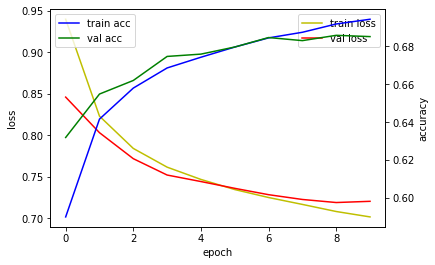

In [36]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

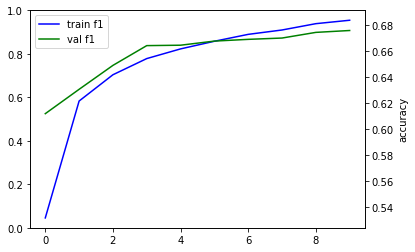

In [37]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

acc_ax.plot(history.history['f1_m'], 'b', label='train f1')
acc_ax.plot(history.history['val_f1_m'], 'g', label='val f1')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

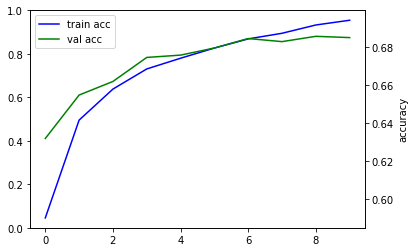

In [38]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

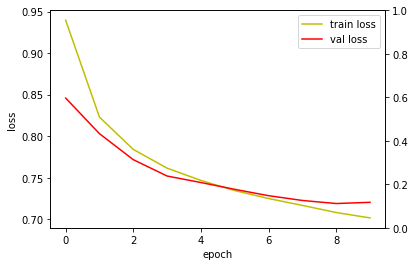

In [39]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')

plt.show()

In [33]:
model.save('C:\\Users\\user\\Documents\\GitHub\\grad_project\\recipe_rating\\preprocessing\\model\\model4.h5')

In [34]:
model.save_weights('C:\\Users\\user\\Documents\\GitHub\\grad_project\\recipe_rating\\preprocessing\\model\\model4')